In [1]:
# Libraries
import math
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress

In [2]:
# We load the file "GlobalLandTemperaturesByCity.csv"
file_path = r'C:\\Users\\User\\Documents\\StatisticaPj\\Data\\GlobalLandTemperaturesByCity.csv'
data = pd.read_csv(file_path)

#We load the file "GlobalTemperatures.csv."
file_path = r'C:\\Users\\User\\Documents\\StatisticaPj\\Data\\GlobalTemperatures.csv'
data1 = pd.read_csv(file_path)

## 1. Introduction:

The average surface temperature of Earth has been rising over time, mainly due to human activities that contribute to the emission of greenhouse gases like carbon dioxide, methane, and nitrous oxide. This phenomenon is known as global warming. Conceptually, this notion was described by Joseph Fourier in the 1820 as the "Greenhouse Effect"[2]. As a consequence, this warming also leads to more significant shifts in weather patterns, signaled by greater differences in temperatures.

In 1856, Eunice Newton Foote demonstrated that carbon dioxide could significantly raise air temperature and in  1859  John Tyndall's experiments confirmed that gases such as carbon dioxide and water vapor absorb heat, contributing to atmospheric warming. Building on these findings, Svante Arrhenius in 1896 calculated that doubling atmospheric carbon dioxide could increase global temperatures by approximately 5–6°C. Despite early skepticism, the mid-20th century saw accumulating evidence of rising carbon dioxide levels and global temperatures, leading to the establishment of the Intergovernmental Panel on Climate Change (IPCC) in 1988. The IPCC has since provided comprehensive assessments, reinforcing the scientific recognition that human activities are the primary drivers of recent global warming

Although the effects of global warming are increasingly evident in our daily lives, there remain communities that continue to deny its existence and impact. This study, therefore, seeks to validate the reality of global warming by analyzing long-term temperature trends and the rising frequency of extreme weather events. Additionally, it will examine the correlation between land and ocean temperatures to determine whether they influence each other.

## 2. Data:

We have utilized data from the Berkeley Earth Surface Temperature Study, a comprehensive dataset compiled by Berkeley Earth in collaboration with the Lawrence Berkeley National Laboratory. This dataset integrates 1.6 billion temperature reports sourced from 16 pre-existing archives. It offers a robust framework for analysis, with the ability to slice data into subsets such as country-specific information.

The "Climate Change: Earth Surface Temperature Data" dataset was taken from Kaggle [1], having a usability score of 7.65. The dataset contains five data files. From these data files, we have used two of them: "GlobalLandTemperaturesByCity.csv" and "GlobalTemperatures.csv.". In the following sections, we are going to describe how the data was studied, cleaned, and prepared for its use.

### 2.1. Data Study:

We will begin by studying the previously mentioned files: "GlobalLandTemperaturesByCity.csv" and "GlobalTemperatures.csv".

#### 2.1.1. "GlobalLandTemperaturesByCity.csv" file:

In [3]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


Data Types contained in the "GlobalLandTemperaturesByCity.csv" file where: "dt" refers to the date, "AverageTemperature" refers to the average temperature (in celsius) taken on the date specified in "dt", "AverageTemperatureUncertainty" refers to the 95% confidence interval around the "AverageTemperature", "City" refers to the city from which the temperature was taken from, "Country" refers to the country of the specified city and finally,  "Latitude" and "Longitute", refer to the coordinates of the city from which the termperature was taken from.

We follow up with a preview of the first rows from our file:

In [4]:
# We display the first Rows
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


We check for missing values:

In [5]:
# We check for missing values
print(data.isnull().sum())

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64


We observe that our file contains 364130 empty values from both "AverageTemperature" and "AverageTemperatureUncertainity", which we will get rid of during the data cleaing stage.

#### 2.1.2. "GlobalTemperatures.csv" file:

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


Data Types contained in the "GlobalTemperatures.csv" file where: "dt" refers to the date, "LandAverageTemperature" refers to the global average land temperature in celsius, "LandAverageTemperatureUncertainty" refers to the 95% confidence interval around the average, "LandMaxTemperature" refers to the global average maximum land temperature in celsius, "LandMaxTemperatureUncertainty" refers to the 95% confidence interval around the maximum land temperature, "LandMinTemperature" refers to the global average minimum land temperature in celsius, "LandMinTemperatureUncertainty" refers to the 95% confidence interval around the minimum land temperature, "LandAndOceanAverageTemperature" refers to the global average land and ocean temperature in Celsius and finally, "LandAndOceanAverageTemperatureUncertainty", refers to the 95% confidence interval around the global average land and ocean temperature.

We follow up with a preview of the first rows from our file:

In [7]:
# We display the first Rows
data1.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


We check for missing values:

In [8]:
# We check for missing values
print(data1.isnull().sum())

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64


We observe that our file contains empty values, which we will get rid of during the data cleaning stage.

### 2.2 Data Cleaning and Preprocessing: 

During the data cleaning stage, our objective is to organize the datasets by removing unnecessary columns and handle incomplete data. For the "GlobalLandTemperaturesByCity.csv" file, we removed rows with empty values and excluded the "Latitude" and "Longitude" columns, as they are not relevant to our analysis. For the "GlobalTemperatures.csv" file, we retained only the columns 'dt', 'LandAverageTemperature', and 'LandAndOceanAverageTemperature', while eliminating all other columns. Rows containing empty values were also removed to ensure data consistency.
These steps refine the datasets, ensuring they are clean and ready for analysis.

To prepare the data for analysis, we focus on converting columns to appropriate data types and creating new features to enhance usability. For both files, specific columns are reformatted, and additional columns are generated to support our analysis.

After completing the cleaning and preprocessing stages, the "GlobalLandTemperaturesByCity.csv" file includes:

In [9]:
# We clean the data (we get rid of the rows where columns 'AverageTemperature' and 'AverageTemperatureUncertainty' are null)
data = data.dropna(subset=['AverageTemperature','AverageTemperatureUncertainty'])

# We convert the 'dt' column to datetime objects
data['dt'] = pd.to_datetime(data['dt'])

# We filter for the year
data['Year'] = data['dt'].dt.year

# We convert 'city' and 'country' columns to string
data['City'] = data['City'].astype("string")
data['Country'] = data['Country'].astype("string")

# We map the countries in our dataset with the respective continent
continent_mapping = {
    "Denmark": "Europe", "Turkey": "Asia", "Kazakhstan": "Asia", "China": "Asia", 
    "Spain": "Europe", "Germany": "Europe", "Nigeria": "Africa", "Iran": "Asia", 
    "Russia": "Europe", "Canada": "North America", "Côte D'Ivoire": "Africa", 
    "United Kingdom": "Europe", "Saudi Arabia": "Asia", "Japan": "Asia", 
    "United States": "North America", "India": "Asia", "Benin": "Africa", 
    "United Arab Emirates": "Asia", "Mexico": "North America", "Venezuela": "South America",
    "Ghana": "Africa", "Ethiopia": "Africa", "Australia": "Oceania", "Yemen": "Asia", 
    "Indonesia": "Asia", "Morocco": "Africa", "Pakistan": "Asia", "France": "Europe", 
    "Libya": "Africa", "Burma": "Asia", "Brazil": "South America", "South Africa": "Africa", 
    "Syria": "Asia", "Egypt": "Africa", "Algeria": "Africa", "Netherlands": "Europe", 
    "Malaysia": "Asia", "Portugal": "Europe", "Ecuador": "South America", "Italy": "Europe", 
    "Uzbekistan": "Asia", "Philippines": "Asia", "Madagascar": "Africa", "Chile": "South America", 
    "Belgium": "Europe", "El Salvador": "North America", "Romania": "Europe", "Peru": "South America", 
    "Colombia": "South America", "Tanzania": "Africa", "Tunisia": "Africa", "Turkmenistan": "Asia", 
    "Israel": "Asia", "Eritrea": "Africa", "Paraguay": "South America", "Greece": "Europe", 
    "New Zealand": "Oceania", "Vietnam": "Asia", "Cameroon": "Africa", "Iraq": "Asia", 
    "Afghanistan": "Asia", "Argentina": "South America", "Azerbaijan": "Asia", "Moldova": "Europe", 
    "Mali": "Africa", "Congo (Democratic Republic Of The)": "Africa", "Thailand": "Asia", 
    "Central African Republic": "Africa", "Bosnia And Herzegovina": "Europe", "Bangladesh": "Asia", 
    "Switzerland": "Europe", "Equatorial Guinea": "Africa", "Cuba": "North America", 
    "Lebanon": "Asia", "Mozambique": "Africa", "Serbia": "Europe", "Angola": "Africa", "Somalia": "Africa", 
    "Norway": "Europe", "Nepal": "Asia", "Poland": "Europe", "Ukraine": "Europe", 
    "Guinea Bissau": "Africa", "Malawi": "Africa", "Burkina Faso": "Africa", "Slovakia": "Europe", 
    "Congo": "Africa", "Belarus": "Europe", "Gambia": "Africa", "Czech Republic": "Europe", 
    "Hungary": "Europe", "Burundi": "Africa", "Zimbabwe": "Africa", "Bulgaria": "Europe", 
    "Haiti": "North America", "Puerto Rico": "North America", "Sri Lanka": "Asia", "Nicaragua": "North America", 
    "Zambia": "Africa", "Honduras": "North America", "Taiwan": "Asia", "Bolivia": "South America", 
    "Guinea": "Africa", "Ireland": "Europe", "Senegal": "Africa", "Latvia": "Europe", "Qatar": "Asia", 
    "Albania": "Europe", "Tajikistan": "Asia", "Kenya": "Africa", "Guatemala": "North America", 
    "Finland": "Europe", "Sierra Leone": "Africa", "Sweden": "Europe", "Botswana": "Africa", 
    "Guyana": "South America", "Austria": "Europe", "Uganda": "Africa", "Armenia": "Asia", 
    "Dominican Republic": "North America", "Jordan": "Asia", "Djibouti": "Africa", "Sudan": "Africa", 
    "Lithuania": "Europe", "Rwanda": "Africa", "Jamaica": "North America", "Togo": "Africa", 
    "Macedonia": "Europe", "Cyprus": "Asia", "Gabon": "Africa", "Slovenia": "Europe", "Bahrain": "Asia", 
    "Swaziland": "Africa", "Niger": "Africa", "Lesotho": "Africa", "Liberia": "Africa", "Uruguay": "South America", 
    "Chad": "Africa", "Bahamas": "North America", "Mauritania": "Africa", "Panama": "North America", 
    "Suriname": "South America", "Cambodia": "Asia", "Montenegro": "Europe", "Mauritius": "Africa", 
    "Papua New Guinea": "Oceania", "Iceland": "Europe", "Croatia": "Europe", "Reunion": "Africa", "Oman": "Asia", 
    "Costa Rica": "North America", "South Korea": "Asia", "Hong Kong": "Asia", "Singapore": "Asia", 
    "Estonia": "Europe", "Georgia": "Asia", "Mongolia": "Asia", "Laos": "Asia", "Namibia": "Africa"
}

# Map countries to continents
data['Continent'] = data['Country'].map(continent_mapping)
data['Continent'] = data['Continent'].astype("string")

# Confidence intervals:

# We calculate the lower bound
data['LowerBound'] = data['AverageTemperature'] - data['AverageTemperatureUncertainty']
# We calculate the upper bound
data['UpperBound'] = data['AverageTemperature'] + data['AverageTemperatureUncertainty']

# We assign the season of each entry

# Extract the month from the 'dt' column
data['Month'] = data['dt'].dt.month

# Define a function to map months to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Apply the function to create the 'Season' column
data['Season'] = data['Month'].apply(get_season)
data['Season'] = data['Season'].astype("string")

# We drop the unecessary 'Month' column
data.drop(columns=['Month'], inplace=True)
data.drop(columns=['Latitude'], inplace=True)
data.drop(columns=['Longitude'], inplace=True)
data.drop(columns=['City'], inplace=True)
data.drop(columns=['Country'], inplace=True)

# Select relevant columns
data = data[['Year', 'Season', 'AverageTemperature', 'AverageTemperatureUncertainty', 'LowerBound', 'UpperBound', 'Continent']]

# Verify changes
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 8235082 entries, 0 to 8599210
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   Year                           int32  
 1   Season                         string 
 2   AverageTemperature             float64
 3   AverageTemperatureUncertainty  float64
 4   LowerBound                     float64
 5   UpperBound                     float64
 6   Continent                      string 
dtypes: float64(4), int32(1), string(2)
memory usage: 471.2 MB


,Year,Season,AverageTemperature,AverageTemperatureUncertainty,LowerBound,UpperBound,Continent
0,1743,Autumn,6.068,1.737,4.331,7.805,Europe
5,1744,Spring,5.788,3.624,2.164,9.412,Europe
6,1744,Spring,10.644,1.283,9.361,11.927,Europe
7,1744,Summer,14.051,1.347,12.704,15.398,Europe
8,1744,Summer,16.082,1.396,14.686,17.478,Europe


And for "GlobalTemperatures.csv" file:

In [10]:
# Drop rows with missing values
data1 = data1.dropna()

# Convert the "dt" column to datetime format and extract the year
data1['dt'] = pd.to_datetime(data1['dt'])
data1['Year'] = data1['dt'].dt.year

# Select relevant columns
data1 = data1[['Year', 'LandAverageTemperature', 'LandAndOceanAverageTemperature']]

# Verify changes
data1.info()
data1.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1992 entries, 1200 to 3191
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            1992 non-null   int32  
 1   LandAverageTemperature          1992 non-null   float64
 2   LandAndOceanAverageTemperature  1992 non-null   float64
dtypes: float64(2), int32(1)
memory usage: 54.5 KB


,Year,LandAverageTemperature,LandAndOceanAverageTemperature
1200,1850,0.749,12.833
1201,1850,3.071,13.588
1202,1850,4.954,14.043
1203,1850,7.217,14.667
1204,1850,10.004,15.507


## 3. Descriptive Statistics:

First, we will present some basic descriptive statistics for our datasets. We will only include the relevant columns.

For "GlobalTemperaturesByCity.csv" we have:

In [11]:
# Get Summary
data[['AverageTemperature']].describe()

,AverageTemperature
count,8.235082e+06
mean,1.672743e+01
std,1.035344e+01
min,-4.270400e+01
25%,1.029900e+01
50%,1.883100e+01
75%,2.521000e+01
max,3.965100e+01


The dataset contains 8235082 temperature records, with an average temperature of approximately 16.73°C. The standard deviation is around 10.35°C, indicating a significant range of temperature variation. The lowest recorded temperature is -42.74°C, while the highest is 39.65°C. In terms of distribution, 25% of the recorded temperatures are below 10.29°C, the median temperature is 18.83°C, and 75% of the temperatures fall below 25.21°C. These statistics provide a general overview of the range and distribution of daily temperatures in the dataset.

And for "GlobalTemperatures.csv" we have:

In [12]:
# Get Summary
data1[['LandAverageTemperature', 'LandAndOceanAverageTemperature']].describe()

,LandAverageTemperature,LandAndOceanAverageTemperature
count,1992.000000,1992.000000
mean,8.571583,15.212566
std,4.263193,1.274093
min,0.404000,12.475000
25%,4.430000,14.047000
50%,8.850500,15.251000
75%,12.858500,16.396250
max,15.482000,17.611000


The summary statistics for the 'LandAverageTemperature' and 'LandAndOceanAverageTemperature' columns show that both have 1,992 entries. The average land temperature is 8.57°C, while the combined land and ocean temperature is 15.21°C. The land temperature has more variability with a standard deviation of 4.26°C, compared to 1.27°C for the land and ocean temperature. The lowest recorded land temperature is 0.40°C, while the land and ocean temperature's minimum is 12.48°C. The median land temperature is 8.85°C, and for the combined temperature, it's 15.25°C. The highest recorded land temperature is 15.48°C, while the maximum for land and ocean is 17.61°C, indicating slightly higher extremes in the combined data.

### 3.1. Line Plots: 

For a comprehensive understanding of the issue, we have displayed the following plots.

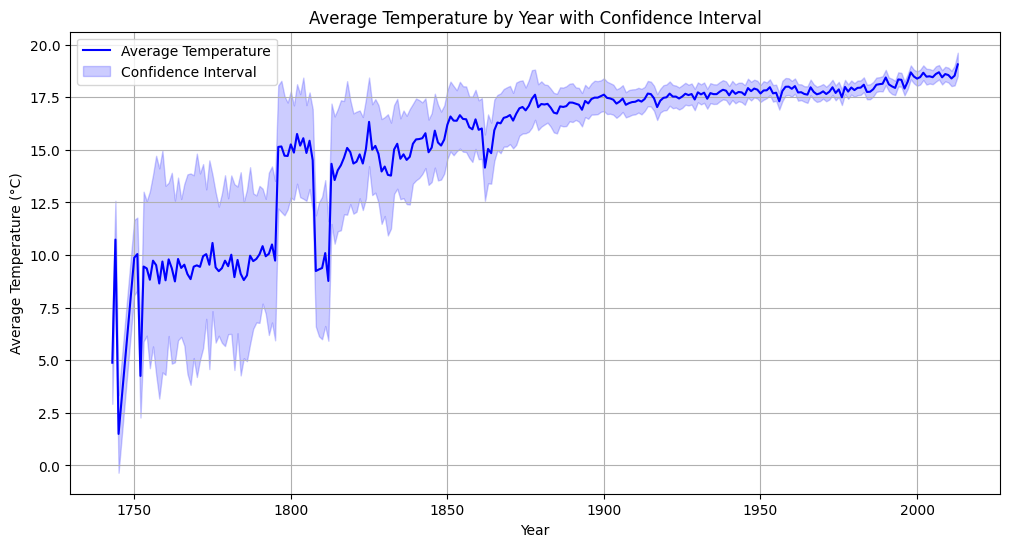

In [13]:
# For beginning we want to compute annual average temperature
# Because global warming is characterized by temperature raises and bigger differences between them (min-max)

# Group by Year and calculate mean temperature and uncertainty
yearly_data = data.groupby('Year').agg(
    AverageTemperature=('AverageTemperature', 'mean'),
    AverageTemperatureUncertainty=('AverageTemperatureUncertainty', 'mean')
).reset_index()

# Calculate confidence intervals
yearly_data['LowerBound'] = yearly_data['AverageTemperature'] - yearly_data['AverageTemperatureUncertainty']
yearly_data['UpperBound'] = yearly_data['AverageTemperature'] + yearly_data['AverageTemperatureUncertainty']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(yearly_data['Year'], yearly_data['AverageTemperature'], label='Average Temperature', color='blue')
plt.fill_between(yearly_data['Year'], yearly_data['LowerBound'], yearly_data['UpperBound'], 
                 color='blue', alpha=0.2, label='Confidence Interval')
plt.title('Average Temperature by Year with Confidence Interval')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


The plot shows a clear upward trend in average temperatures over the years, particularly from the 1800s onwards, indicating global warming. In earlier periods, the temperatures are relatively stable, but fluctuations are more noticeable around the 18th and 19th centuries. The confidence interval, which shows the degree of uncertainty or variability in the temperature data, is represented by the blue shaded area. This interval narrows as we move closer to the 20th century, demonstrating that the data gets more dependable over time, but in the early years it is wider, suggesting greater uncertainty in the measurements.

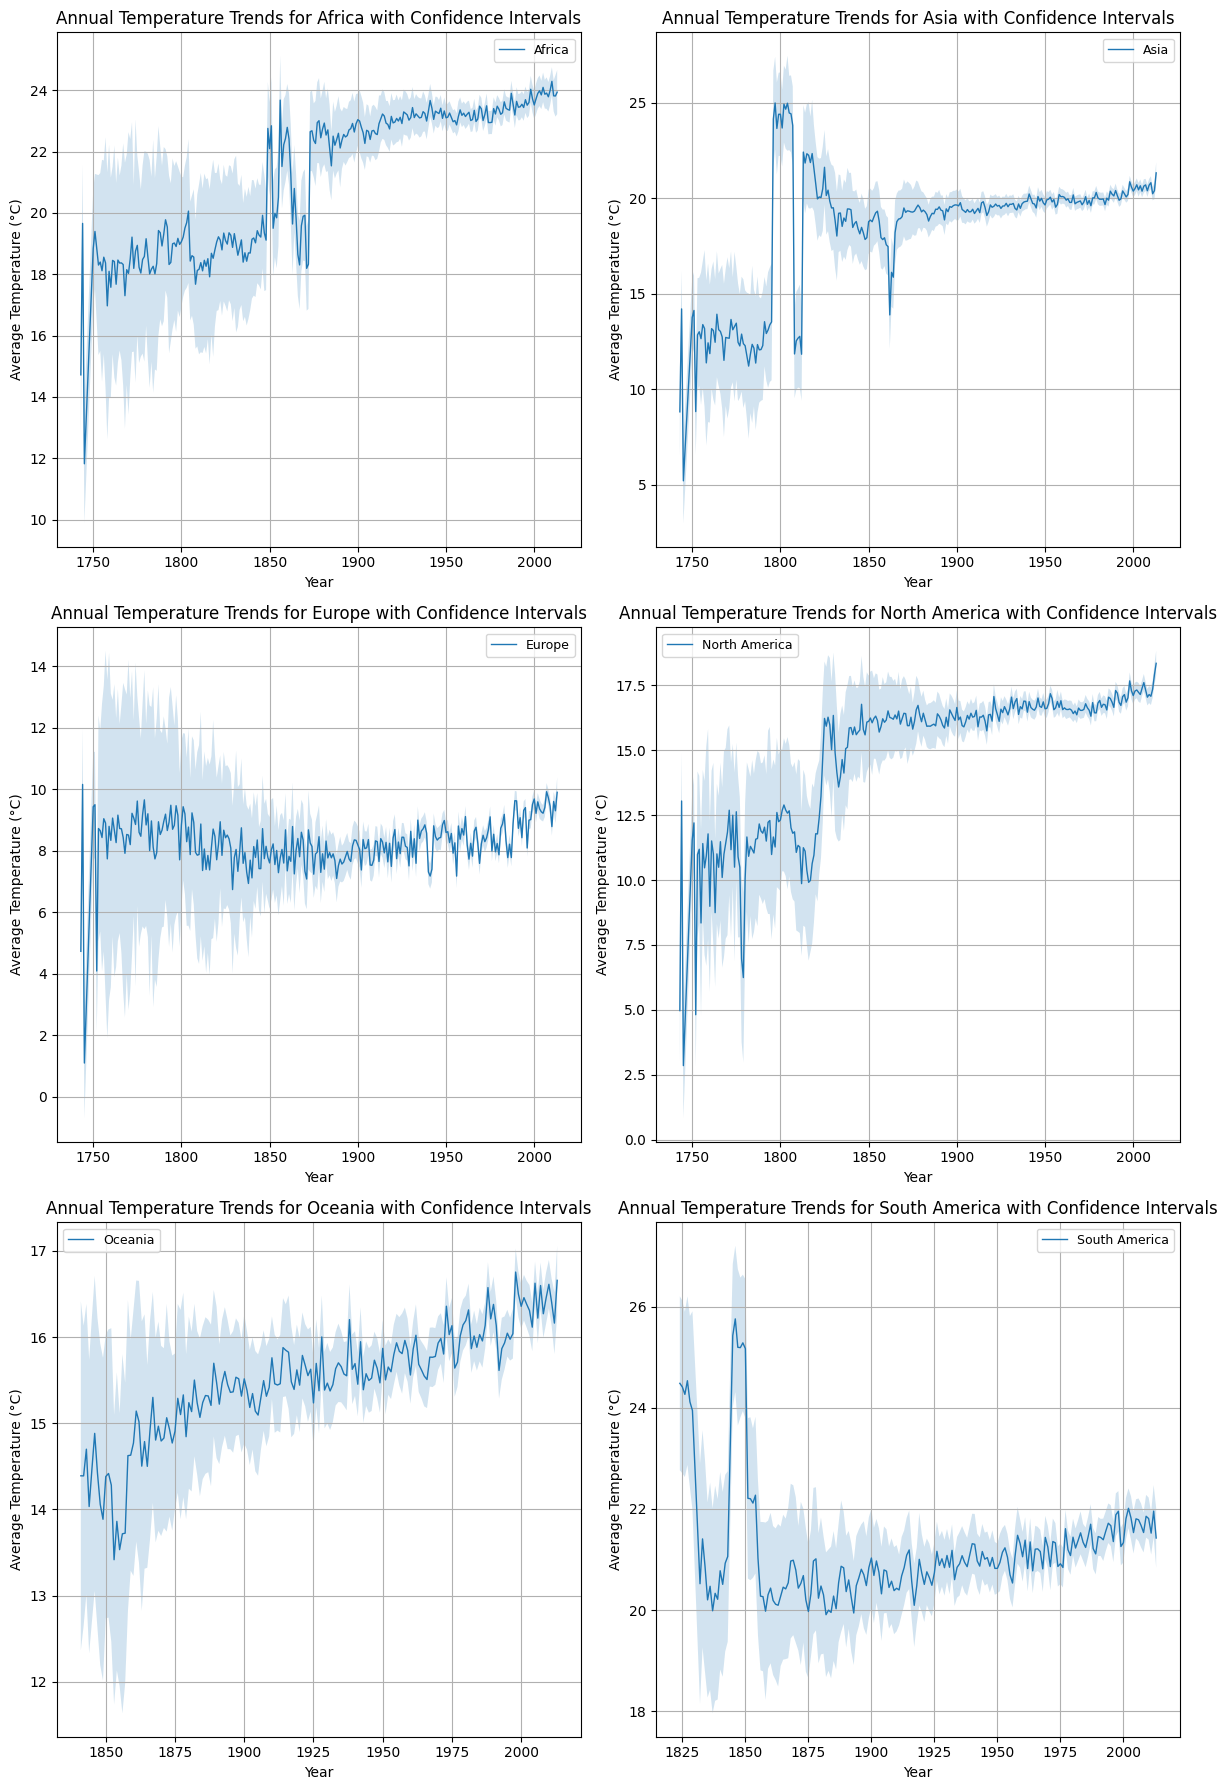

In [14]:
# Group by Continent and Year, calculate average temperature
average_temp_by_continent = data.groupby(['Continent', 'Year'], as_index=False).agg({
    'AverageTemperature': 'mean',
    'LowerBound': 'mean',
    'UpperBound': 'mean'
})

# Number of unique continents
unique_continents = average_temp_by_continent['Continent'].unique()
num_continents = len(unique_continents)

# Determine grid size for subplots
rows = math.ceil(num_continents / 2)  # Two columns per row
cols = 2

# Create the plot
plt.figure(figsize=(12, 6 * rows))  # Adjust height dynamically

# Plot the continent average temperature by year with confidence intervals
for i, continent in enumerate(unique_continents, 1):
    continent_data = average_temp_by_continent[average_temp_by_continent['Continent'] == continent]
    
    # Plot as subplots
    plt.subplot(rows, cols, i)
    
    plt.plot(
        continent_data['Year'],
        continent_data['AverageTemperature'],
        label=continent,
        linewidth=1
    )
    plt.fill_between(
        continent_data['Year'],
        continent_data['LowerBound'],
        continent_data['UpperBound'],
        alpha=0.2
    )

    # Add plot label and title
    plt.title(f'Annual Temperature Trends for {continent} with Confidence Intervals', fontsize=12)
    plt.xlabel('Year', fontsize=10)
    plt.ylabel('Average Temperature (°C)', fontsize=10)
    plt.grid(True)
    plt.legend(fontsize=9)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

The plots demonstrate a clear global warming trend across all continents, with average temperatures steadily increasing over time. Due to uncertainty, early data—especially before 1850—shows wider confidence intervals, whereas contemporary records after 1900 have narrower intervals and are more dependable.

Particularly after the mid-20th century, Africa and Asia show notable warming trends, with Asia's rise being especially steep. Europe and North America show strong and consistent warming, with Europe benefiting from historically more reliable data. Because of its oceanic climate, Oceania has consistently rising temperatures but lower averages. South America also warms steadily, though less dramatically than other continents.

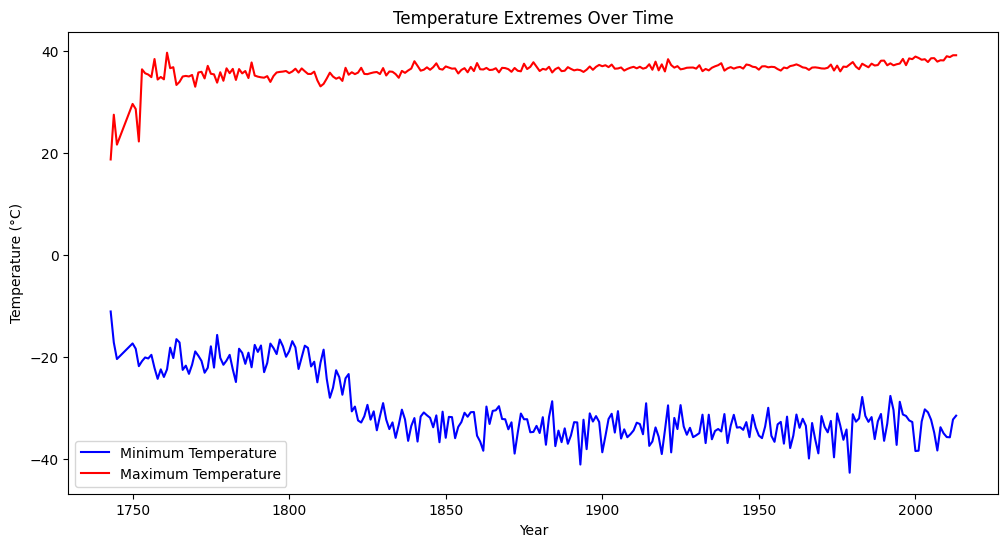

In [15]:
#Compute Temperature Extremes and we plot them
temp_extremes = data.groupby('Year')['AverageTemperature'].agg(['min','max'])

#Plot the anual temperature trend
plt.figure(figsize=(12, 6))
plt.plot(temp_extremes['min'], label='Minimum Temperature', color='blue')
plt.plot(temp_extremes['max'], label='Maximum Temperature', color='red')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Extremes Over Time')
plt.legend()
plt.show()

This plot shows the trends of temperature extremes—minimum and maximum temperatures—over time. The red line represents maximum temperatures, which remain relatively stable around 40°C after an initial increase during the earlier years of the dataset. This implies that there has not been any discernible variation or long-term patterns in maximum temperatures over time. From the earliest times until roughly the 19th century, the blue line, which represents minimum temperatures, clearly shows a downward trend. In more recent years, it stabilizes at lower values of about -40°C. This indicates that minimum temperatures have historically experienced greater fluctuations and a long-term cooling trend before stabilizing.

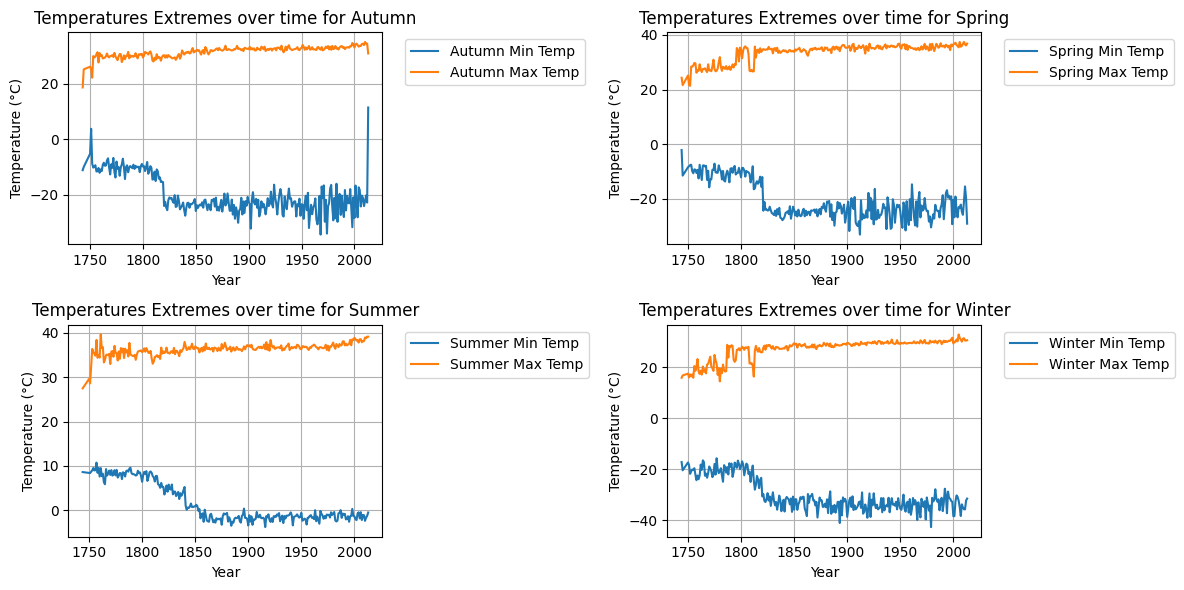

In [16]:
# Group data by Season and Year to calculate min and max temperatures
seasonal_trends = data.groupby(['Season', 'Year']).agg({
    'AverageTemperature': ['min', 'max']
}).reset_index()

# Rename columns for easier access
seasonal_trends.columns = ['Season', 'Year', 'MinTemperature', 'MaxTemperature']

# Plotting trends for each season
plt.figure(figsize=(12, 6))

# Loop through each season and plot
for i, season in enumerate(seasonal_trends['Season'].unique(), 1):
    season_data = seasonal_trends[seasonal_trends['Season'] == season]
    
    # We want subplots
    plt.subplot(2, 2, i)
    
    # Plot minimum temperature trend
    plt.plot(season_data['Year'], season_data['MinTemperature'], label=f'{season} Min Temp')
    
    # Plot maximum temperature trend
    plt.plot(season_data['Year'], season_data['MaxTemperature'], label=f'{season} Max Temp')
    
    # Add labels, title, and legend
    plt.title(f'Temperatures Extremes over time for {season}')
    plt.xlabel('Year')
    plt.ylabel('Temperature (°C)')
    plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)

# We show the plot
plt.tight_layout()
plt.show()

The lowest and maximum temperature extremes for each season are displayed in these plots over time. After the 1750s, maximum temperatures stabilize with only slight variations, while minimum temperatures trend downward before leveling off at lower levels. Winter exhibits the most extreme variability in minimum temperatures, reaching as low as -40°C, while summer shows the narrowest range. Spring and autumn have moderate trends, stabilizing in the early 20th century. These patterns imply that minimum temperatures, especially during the winter, have been more erratic in the past but have leveled off in the last few centuries.

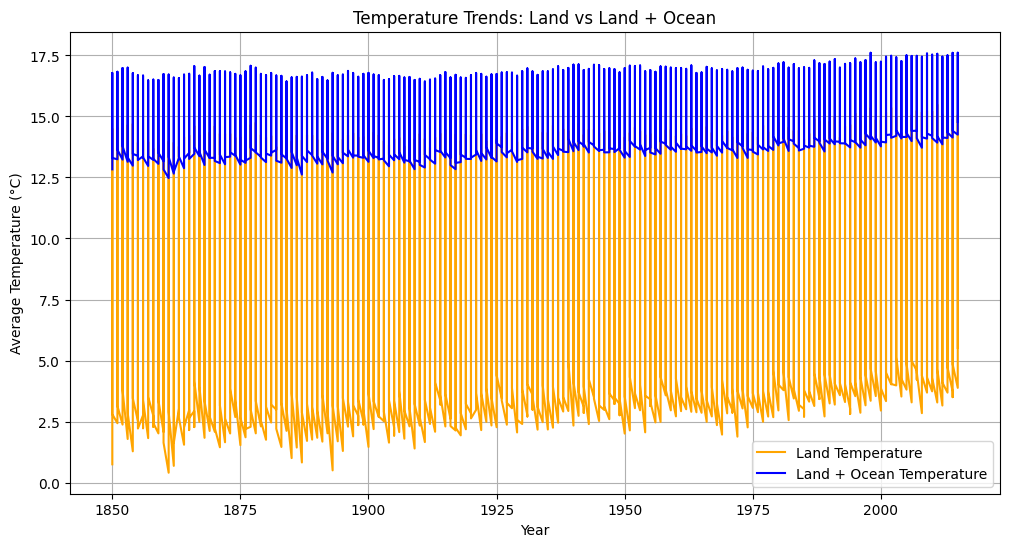

In [17]:
# Plot temperature trends for land and ocean
plt.figure(figsize=(12, 6))
plt.plot(data1['Year'], data1['LandAverageTemperature'], label='Land Temperature', color='orange')
plt.plot(data1['Year'], data1['LandAndOceanAverageTemperature'], label='Land + Ocean Temperature', color='blue')
plt.title('Temperature Trends: Land vs Land + Ocean')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


#Conclusions
#1.Temperatures are rising over time:
# At the beginning of the graph (1850–1900), temperatures were lower.
# By the end of the graph (2000s), both lines show higher temperatures, meaning the planet is getting warmer.

#2. Land is warming faster than the oceans:
# The orange line (land temperature) and the blue line (global temperature) move closer together over time. 
# This shows that land is heating up more quickly than the global average.

#3. Seasonal variations:
# he orange line has big spikes (up and down) because land temperatures change a lot between summer and winter.
# The blue line is smoother because oceans stabilize the temperature—they heat up and cool down more slowly than land.

#4. Why does this matter?
# Rising temperatures suggest global warming is happening. This can lead to serious problems like melting ice caps,
# rising sea levels, and extreme weather events.


The graph shows a clear rise in temperatures over time, with lower values between 1850 and 1900 and higher values by the 2000s, indicating global warming. Land temperatures are increasing faster than ocean temperatures, evident from the narrowing gap between land and land + ocean lines. While the blue line stays smoother, reflecting the moderating influence of the ocean, seasonal variations are more noticeable in land temperatures, with sharp spikes between summer and winter. These trends highlight the impact of global warming, including rising sea levels and more extreme weather events.

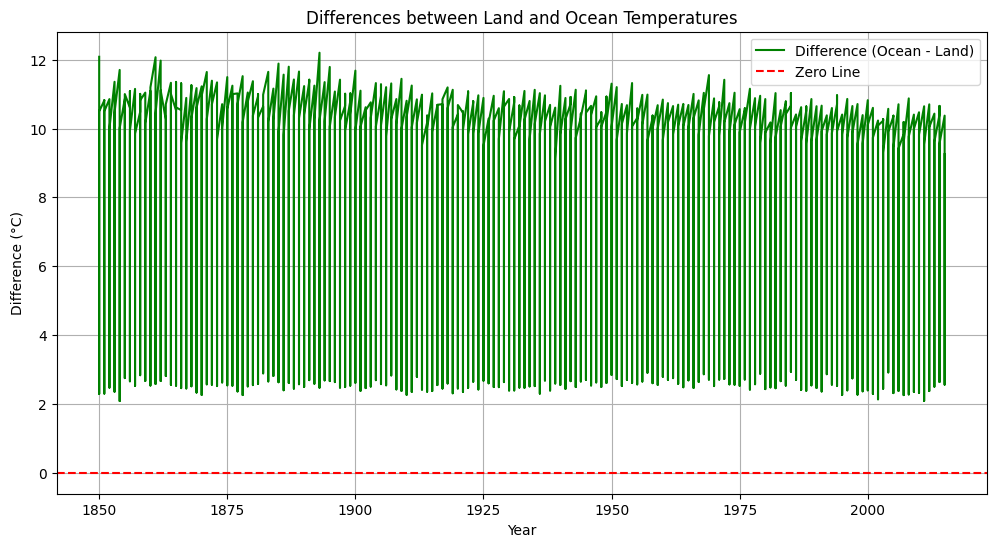

In [18]:
# Calculate the difference between land and ocean temperatures
data1['Difference'] = data1['LandAndOceanAverageTemperature'] - data1['LandAverageTemperature']

# Plot the differences over time
plt.figure(figsize=(12, 6))
plt.plot(data1['Year'], data1['Difference'], label='Difference (Ocean - Land)', color='green')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Line')
plt.title('Differences between Land and Ocean Temperatures')
plt.xlabel('Year')
plt.ylabel('Difference (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Why it’s useful:
# This lets us see how much the ocean moderates global temperature compared to land. 
# Positive values mean the ocean is warmer than the land, while negative values mean the opposite.
# red dashed line at y=0 indicates the point where ocean and land temperatures are equal.
#conslusions 
#The green line is consistently above the red dashed line, meaning that the global temperature (land + ocean)
# has generally been higher than the land-only temperature over the entire time period.
#The difference between ocean and land temperatures fluctuates between approximately 2°C and 12°C.
#The green line shows a slight decrease in amplitude toward the right (more recent years). 
# This could mean that the gap between land and ocean temperatures is becoming smaller.
#This aligns with the idea that land is warming faster than oceans due to climate change.
# Conclusions:
# Oceans moderate global temperature:

# The consistent difference shows that oceans act as a stabilizing force for Earth's climate. 
# They absorb and release heat more slowly than land, which reduces global temperature fluctuations.
# Land is warming faster than oceans:

# The slight narrowing of the difference over time suggests that land temperatures are rising at a faster rate than ocean
# temperatures. This is a sign of global warming disproportionately affecting land areas.
# Seasonal variability:

# The green line's spikes reflect the more extreme temperature changes on land, especially between summer and winter, 
#compared to the oceans' more stable temperatures.
# No reversal of trends:

# The green line staying above zero means that oceans are consistently warmer than land on average, 
# which has not reversed at any point in the data.

The plot demonstrates that oceans consistently moderate global temperatures, with the green line showing that global (land + ocean) temperatures are always higher than land-only temperatures. The difference ranges between 2°C and 12°C, with a slight decrease in recent years, indicating that land is warming faster than oceans due to climate change. Oceans absorb and release heat more slowly, reducing temperature fluctuations, while the green line’s spikes reflect more extreme seasonal variations on land compared to the oceans' stability. This consistent trend highlights the oceans' stabilizing role and underscores the faster warming of land as a clear sign of global warming.

### 3.2 Histograms: 

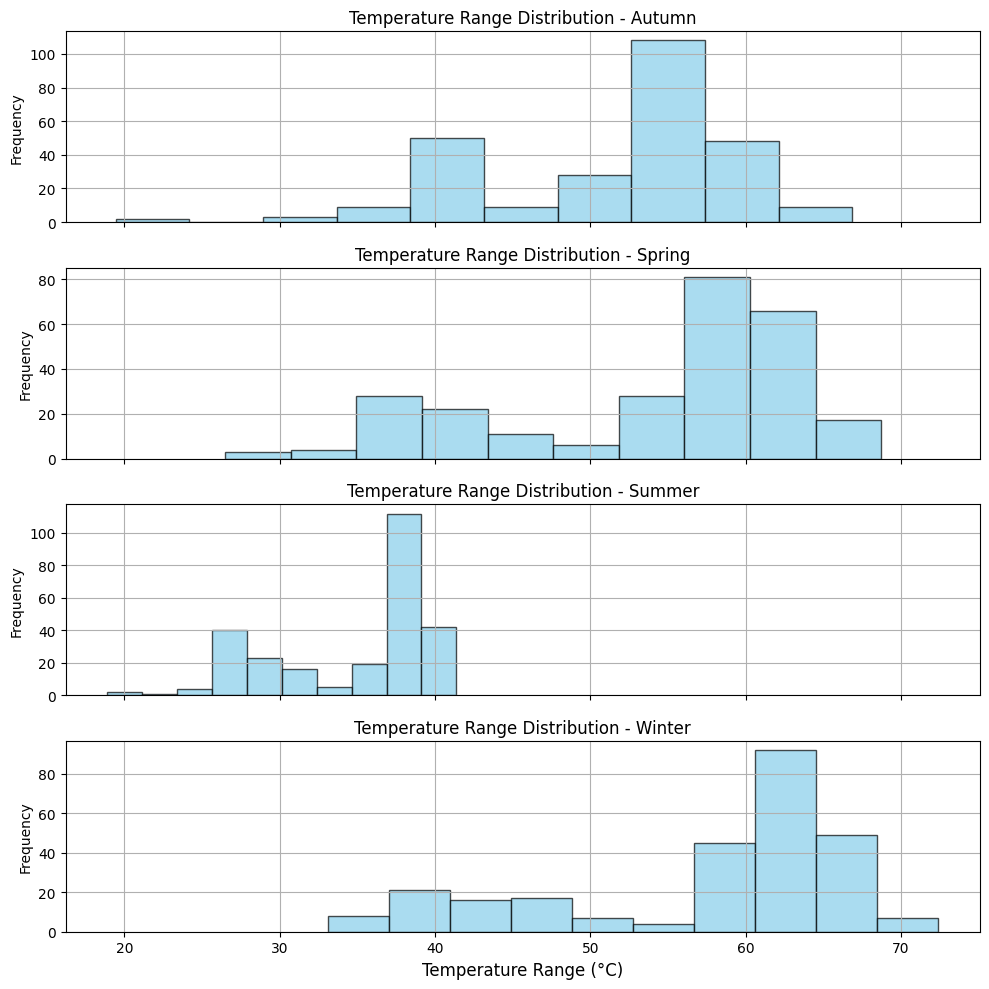

In [19]:
# Group by Year and Season, calculate the temperature range (max - min) for each season
seasonal_data = data.groupby(['Year', 'Season'])['AverageTemperature'].agg(['min', 'max']).reset_index()
seasonal_data['TemperatureRange'] = seasonal_data['max'] - seasonal_data['min']

# Unique seasons
seasons = seasonal_data['Season'].unique()

# Create subplots for separate histograms
fig, axes = plt.subplots(nrows=len(seasons), ncols=1, figsize=(10, 10), sharex=True)

for i, season in enumerate(seasons):
    # Filter data for the current season
    season_data = seasonal_data[seasonal_data['Season'] == season]
    
    # Plot histogram for temperature range
    axes[i].hist(season_data['TemperatureRange'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(f"Temperature Range Distribution - {season}", fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=10)
    axes[i].grid(True)

# Set x-axis label for the last subplot
axes[-1].set_xlabel("Temperature Range (°C)", fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

These histograms depict the distribution of temperature ranges across the four seasons: autumn, spring, summer, and winter. Temperature ranges in the fall are fairly evenly distributed, with the majority of values falling within the mid-range. In wider temperature ranges, spring exhibits a similar pattern, but with a slightly higher frequency. When compared to other seasons, the temperature range distribution in the summer is smaller and less variable. With peaks centered around higher ranges, winter displays the widest distribution of temperature ranges, indicating more severe cold conditions than the other seasons. This seasonal breakdown highlights that temperature variability is most pronounced in winter and least in summer.

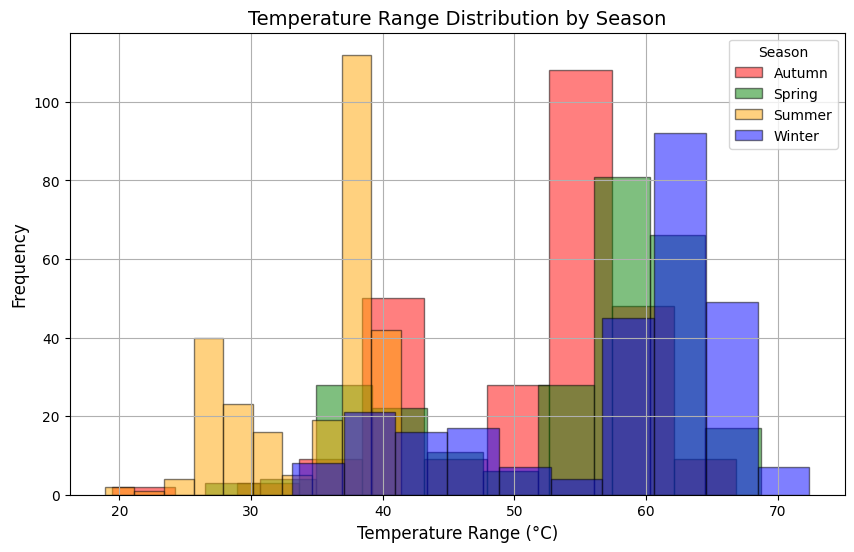

In [20]:
# Define colors for each season
colors = {'Spring': 'green', 'Summer': 'orange', 'Autumn': 'red', 'Winter': 'blue'}

# Plot histograms for all seasons on a single figure
plt.figure(figsize=(10, 6))

for season in seasons:
    # Filter data for the current season
    season_data = seasonal_data[seasonal_data['Season'] == season]
    
    # Plot histogram
    plt.hist(
        season_data['TemperatureRange'], 
        bins=10, 
        alpha=0.5,  # Transparency
        label=season, 
        color=colors.get(season, 'gray'),
        edgecolor='black'
    )

# Add labels and legend
plt.title("Temperature Range Distribution by Season", fontsize=14)
plt.xlabel("Temperature Range (°C)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title="Season")
plt.grid(True)
plt.show()

This combined histogram compares the temperature distributions across seasons. Autumn and spring have overlapping distributions, with most temperatures ranging from 40°C to 55°C, showing moderate variability. Summer has a narrower range around 40°C, indicating less variation. Winter shows a wider spread, with temperatures from 50°C to 70°C, reflecting extreme variability. Compared to individual seasonal histograms, this view confirms that winter has the widest range, while summer has the least, with autumn and spring showing intermediate variability.

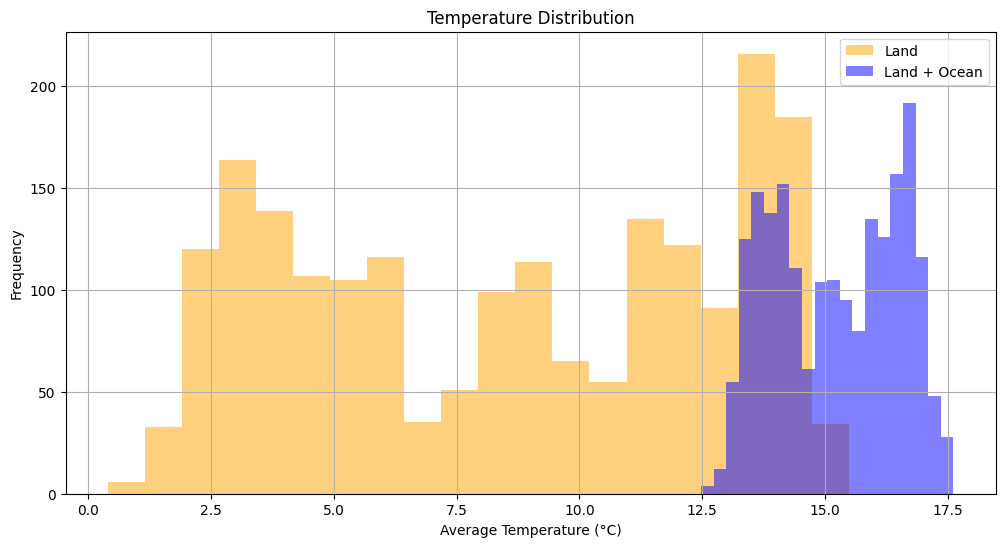

In [21]:
# Histogram for temperature distributions
plt.figure(figsize=(12, 6))
plt.hist(data1['LandAverageTemperature'], bins=20, alpha=0.5, label='Land', color='orange')
plt.hist(data1['LandAndOceanAverageTemperature'], bins=20, alpha=0.5, label='Land + Ocean', color='blue')
plt.title('Temperature Distribution')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

This histogram compares the distribution of land temperatures with combined land and ocean temperatures. With a range of almost 0°C to 15°C, land temperatures exhibit more variability. In contrast, land + ocean temperatures are more concentrated between 12.5°C and 17.5°C, reflecting the ocean's moderating effect. The overlap highlights common temperature ranges between 12.5°C and 15°C. In contrast to the ocean-influenced dataset, the land-only data exhibits more extreme low temperatures, suggesting greater variability.

### 3.3. Box Plot:

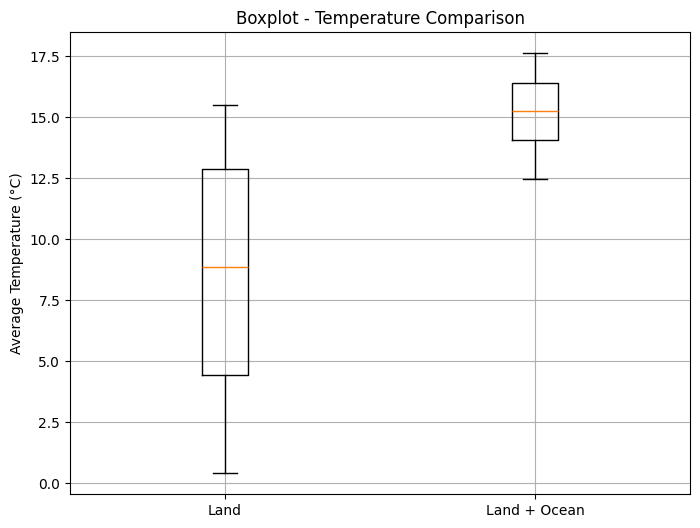

In [22]:
# Boxplot to compare temperature variability
plt.figure(figsize=(8, 6))
plt.boxplot([data1['LandAverageTemperature'], data1['LandAndOceanAverageTemperature']], tick_labels=['Land', 'Land + Ocean'])
plt.title('Boxplot - Temperature Comparison')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.show()

This boxplot compares the distributions of average land temperatures and land + ocean temperatures. The range of land temperatures is greater, with a lower median of about 9°C and notable variability ranging from close to 0°C to roughly 15°C. On the other hand, because of the moderating effect of the oceans, land + ocean temperatures have a narrower range and a higher median around 15°C, indicating greater stability. The plot highlights the broader variability of land temperatures compared to the more consistent global averages.

### 3.4. Frequency Polygons:

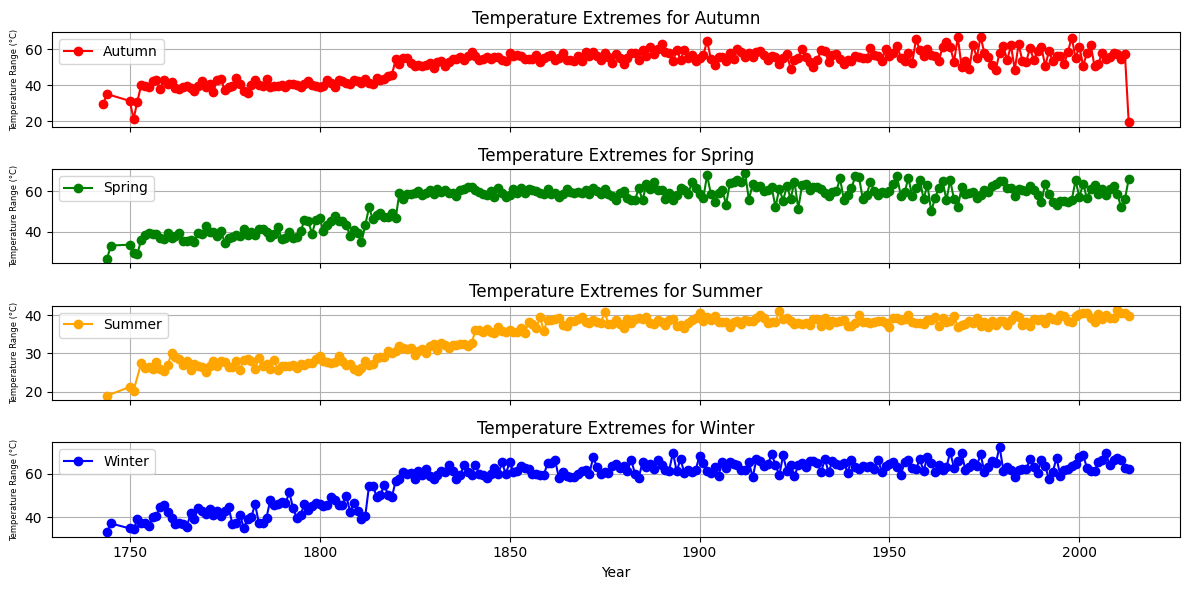

In [23]:
# Group by Year and Season, calculate the temperature range (max - min) for each season
seasonal_data = data.groupby(['Year', 'Season'])['AverageTemperature'].agg(['min', 'max']).reset_index()
seasonal_data['TemperatureRange'] = seasonal_data['max'] - seasonal_data['min']

# Plot frequency polygons for each season
seasons = seasonal_data['Season'].unique()

# Define a color map for seasons
colors = {
    'Spring': 'green',
    'Summer': 'orange',
    'Autumn': 'red',
    'Winter': 'blue'
}

fig, axes = plt.subplots(nrows=len(seasons), ncols=1, figsize=(12, 6), sharex=True)

for i, season in enumerate(seasons):
    # Filter data for the current season
    season_data = seasonal_data[seasonal_data['Season'] == season]
    
    # Plot the temperature range
    axes[i].plot(season_data['Year'], season_data['TemperatureRange'], marker='o', label=season, color=colors.get(season))
    axes[i].set_title(f"Temperature Extremes for {season}")
    axes[i].set_ylabel("Temperature Range (°C)", fontsize=6)
    axes[i].grid(True)
    axes[i].legend()

# Set the x-axis label for the last subplot
axes[-1].set_xlabel("Year")

# Adjust layout
plt.tight_layout()
plt.show()

The frequency polygons show that winter has the largest and most variable temperature range, increasing from below 30°C to around 60°C over time. Summer maintains the most consistent and narrow range, staying near 40°C. Autumn and spring show moderate increases, stabilizing around 50°C. These patterns highlight winter’s greater extremes compared to the other seasons. We can also observe a steady increase of temperature extremes over time, proving thier frequency.

### 3.5. Regression Lines:

The Standard Error: 0.0014
Slope (temperature increase per year): 0.0375°C/year
P-value: 2.1439e-80
R-squared value: 0.7441


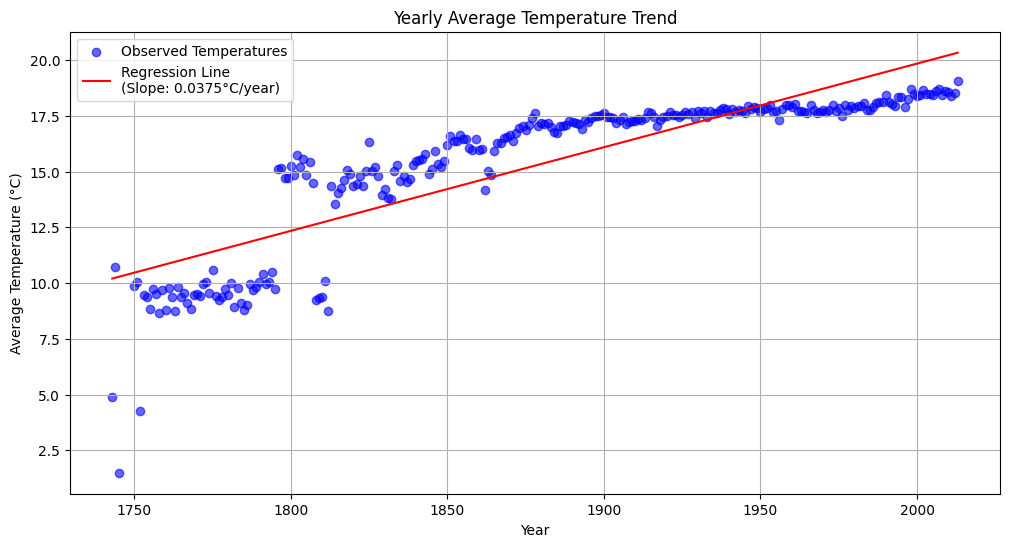

In [24]:
#Calculate how the temperature modifies yearly

# Group data by year and calculate yearly average temperature
yearly_data = data.groupby('Year').agg(AverageTemperature=('AverageTemperature', 'mean')).reset_index()

# Extract the years and temperatures as numpy arrays
X = yearly_data['Year'].values #independent variable 
y = yearly_data['AverageTemperature'].values #dependent variable

# Perform linear regression using scipy for slope and p-value
slope, intercept, r_value, p_value, std_err = linregress(X, y)

# Print the regression statistics
print(f"The Standard Error: {std_err:.4f}")
print(f"Slope (temperature increase per year): {slope:.4f}°C/year")
print(f"P-value: {p_value:.4e}")
print(f"R-squared value: {r_value**2:.4f}")

# Plotting the data and regression line
plt.figure(figsize=(12, 6))
plt.scatter(X, y, label='Observed Temperatures', color='blue', alpha=0.6)
plt.plot(X, intercept + slope * X, color='red', label=f'Regression Line\n(Slope: {slope:.4f}°C/year)')
plt.title('Yearly Average Temperature Trend')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

#We chose linear regression because we want to test the relationship beatween the year and the average temperature/year from 1750 until 2000+ 
#Linear regression : Y = mX + b (Y-dependent var; X-Independent var

#Slope:
#The slope represents the average yearly change in temperature over the analyzed period.
#Because it is positive, it indicates that temperatures are increasing over time.
#Moreover, it increases with 0.0375°C/year

#P-Value:
#The p-value tests the null hypothesis that there is no relationship between the year and average temperature (i.e., the slope is 0).
#If the p-value is small (< 0.05), it suggests that the null hypothesis can be rejected, meaning there is a significant trend in the data.
#A large p-value (e.g., >0.05) suggests the observed trend could be due to random chance, and there is no significant relationship.
#Our P-Value of 2.1439×10^(−80) indicates that the probability of observing the current trend (or one more extreme) under the assumption that there is no actual relationship between year and average temperature is essentially zero. 
#Thus, we reject the null hypothesis and conclude that there is a significant upward trend in average temperatures over time.

#R-Squared:
#The R-squared value measures how well the regression line explains the variability in the data. It ranges from 0 to 1.
#R-squared close to 1: The regression line explains most of the variability in the temperature data.
#R-squared close to 0: The regression line poorly explains the data.
#Our R-Squared value is 0.7441, which means that 70% meaning most of the temperature variability is explained by the increasing trend(strong relationship).

#Conclusion: 
#The data strongly supports global warming, with a clear, statistically significant increase in temperature over time.

With a regression slope of 0.0375°C annually, the plot clearly displays an upward trend in annual average temperatures, suggesting a consistent rise over time. The p-value of 2.14×10⁻⁸⁰ confirms this trend is statistically significant, and the R-squared value of 0.7441 shows that 74.41% of the temperature variation is explained by the trend. This offers compelling proof of a steady and substantial increase in global temperatures brought on by climate change.

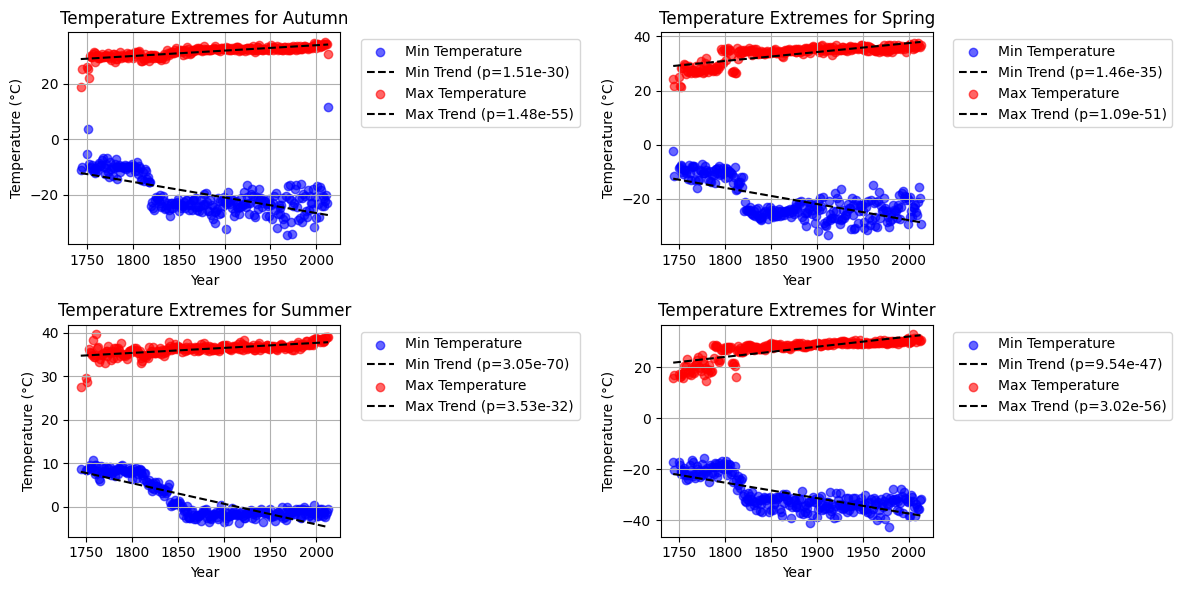

        Min Temp Slope  Min Temp P-value  Min Temp R-value  Max Temp Slope  \
Autumn       -0.056080      1.511042e-30         -0.627674        0.019404   
Spring       -0.059876      1.456370e-35         -0.666707        0.032971   
Summer       -0.047357      3.046442e-70         -0.835992        0.011547   
Winter       -0.060642      9.537971e-47         -0.736623        0.039999   

        Max Temp P-value  Max Temp R-value  
Autumn      1.477335e-55          0.779490  
Spring      1.088215e-51          0.761769  
Summer      3.534887e-32          0.642853  
Winter      3.023242e-56          0.782484  


In [25]:
# Group data by Season and Year to calculate min and max temperatures
seasonal_trends = data.groupby(['Season', 'Year']).agg({
    'AverageTemperature': ['min', 'max']
}).reset_index()

# Rename columns for easier access
seasonal_trends.columns = ['Season', 'Year', 'MinTemperature', 'MaxTemperature']

# Initialize a dictionary to store trend analysis results
trend_results = {}

# Plot and analyze trends for each season
plt.figure(figsize=(12, 6))

for i, season in enumerate(seasonal_trends['Season'].unique(), 1):
    season_data = seasonal_trends[seasonal_trends['Season'] == season]
    
    # Perform linear regression for min and max temperatures
    min_slope, min_intercept, min_rvalue, min_pvalue, min_stderr = linregress(season_data['Year'], season_data['MinTemperature'])
    max_slope, max_intercept, max_rvalue, max_pvalue, max_stderr = linregress(season_data['Year'], season_data['MaxTemperature'])
    
    # Store results for reporting
    trend_results[season] = {
        'Min Temp Slope': min_slope,
        'Min Temp P-value': min_pvalue,
        'Min Temp R-value': min_rvalue,
        'Max Temp Slope': max_slope,
        'Max Temp P-value': max_pvalue,
        'Max Temp R-value': max_rvalue
    }
    
    # Plot min and max temperature trends
    plt.subplot(2, 2, i)
    plt.scatter(season_data['Year'], season_data['MinTemperature'], color='blue', alpha=0.6, label='Min Temperature')
    plt.plot(season_data['Year'], min_slope * season_data['Year'] + min_intercept, color='black', linestyle='--', label=f'Min Trend (p={min_pvalue:.2e})')
    
    plt.scatter(season_data['Year'], season_data['MaxTemperature'], color='red', alpha=0.6, label='Max Temperature')
    plt.plot(season_data['Year'], max_slope * season_data['Year'] + max_intercept, color='black', linestyle='--', label=f'Max Trend (p={max_pvalue:.2e})')
    
    # Add titles and labels
    plt.title(f'Temperature Extremes for {season}')
    plt.xlabel('Year')
    plt.ylabel('Temperature (°C)')
    plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Display the trend results
trend_df = pd.DataFrame(trend_results).T
print(trend_df)


The plots show seasonal trends in minimum and maximum temperatures. Minimum temperatures decline sharply, particularly in winter (-0.066°C/year), before stabilizing, while maximum temperatures remain relatively stable with slight increases. In autumn, spring, and summer, minimum temperatures also decrease, with trends of -0.0658°C/year, -0.0596°C/year, and -0.0473°C/year, respectively. Winter shows the largest increase in maximum temperatures (0.039°C/year). Every trend is statistically significant (p-values < 0.05), showing that the effects of climate change are reflected in an increase in seasonal extremes, particularly during the colder seasons.

Linear Regression for Land Temperatures:
Slope (yearly increase): 0.0085°C/year
Intercept: -7.92

Linear Regression for Land + Ocean Temperatures :
Slope (yearly increase): 0.0054°C/year
Intercept: 4.87


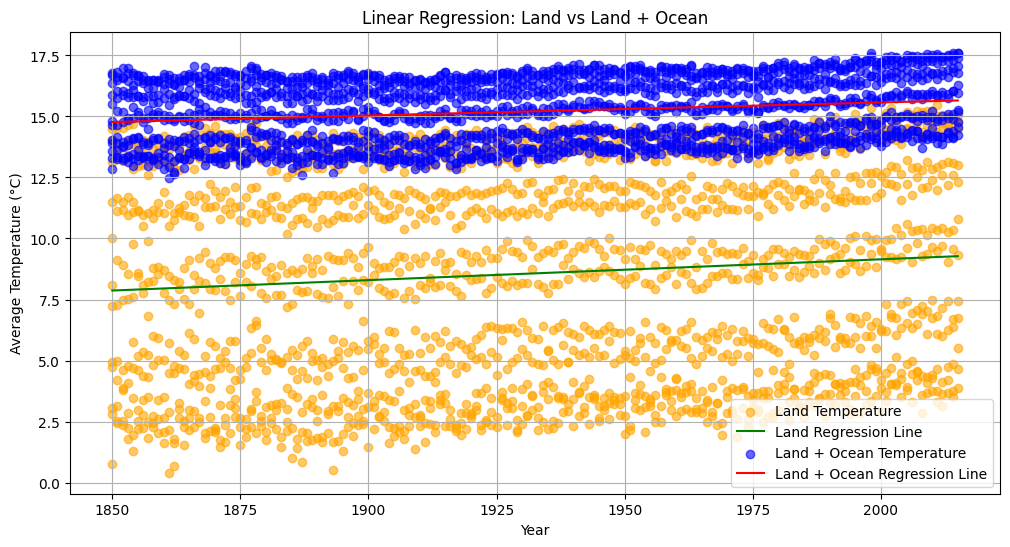

In [26]:
# Prepare data for regression
X = data1['Year'].values.reshape(-1, 1)  # Years (independent variable)
y_land = data1['LandAverageTemperature'].values  # Land temperatures
y_land_ocean = data1['LandAndOceanAverageTemperature'].values  # Land + ocean temperatures

#Regression analysis requires an independent variable (X, years) and one or more dependent variables (y_land, y_land_ocean)
#to model how the dependent variables change over time

# Regression for land temperatures
model_land = LinearRegression()
model_land.fit(X, y_land)

# Regression for combined temperatures
model_land_ocean = LinearRegression()
model_land_ocean.fit(X, y_land_ocean)

# Print regression results
print("Linear Regression for Land Temperatures:")
print(f"Slope (yearly increase): {model_land.coef_[0]:.4f}°C/year")
print(f"Intercept: {model_land.intercept_:.2f}")

print("\nLinear Regression for Land + Ocean Temperatures :")
print(f"Slope (yearly increase): {model_land_ocean.coef_[0]:.4f}°C/year")
print(f"Intercept: {model_land_ocean.intercept_:.2f}")

# Slope: Shows how much the temperature increases per year on average (°C/year).
# Intercept: Represents the temperature at year 0 
# Slope (Yearly Increase):

# Land Temperatures (0.0085°C/year):
# The land temperature is increasing at a rate of 0.0085°C per year.
# This means that over a decade, land temperatures increase by approximately 0.085°C (0.0085 × 10).
# Land + Ocean Temperatures (0.0054°C/year):
# The combined global temperature (land + ocean) is increasing at a rate of 0.0054°C per year.
# Over a decade, this translates to an increase of approximately 0.054°C.
# Intercept:

# Land Temperatures (-7.92):
# The intercept suggests that the model predicts a theoretical temperature of -7.92°C when the year is 0. While this value has no physical meaning (since we’re analyzing data starting around 1850), it’s part of the regression line’s equation.
# Land + Ocean Temperatures (4.87):
# Similarly, the intercept for land + ocean temperatures is 4.87°C in year 0. Again, this value is only mathematical and not directly interpretable.
# Land is Warming Faster than the Global Average:

# The slope for land temperatures (0.0085°C/year) is higher than the slope for global temperatures (0.0054°C/year).
# This shows that land areas are warming at a faster rate than the global average, which includes the moderating effect of oceans.
# Significant Evidence of Global Warming:

# Both slopes are positive, confirming a consistent upward trend in temperatures over time.
# This is clear evidence of global warming affecting both land and the planet as a whole.
# Quantifying the Difference:

# Land temperatures are warming approximately 1.57 times faster than the global average (0.0085 ÷ 0.0054 ≈ 1.57).
# This is consistent with the scientific understanding that land warms more quickly due to the lower heat capacity of soil and air compared to water.

# Visualize regression lines
plt.figure(figsize=(12, 6))
plt.scatter(data1['Year'], data1['LandAverageTemperature'], label='Land Temperature', alpha=0.6, color='orange')
plt.plot(data1['Year'], model_land.predict(X), label='Land Regression Line', color='green')

plt.scatter(data1['Year'], data1['LandAndOceanAverageTemperature'], label='Land + Ocean Temperature', alpha=0.6, color='blue')
plt.plot(data1['Year'], model_land_ocean.predict(X), label='Land + Ocean Regression Line', color='red')

plt.title('Linear Regression: Land vs Land + Ocean')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Vertical Gaps Between the Lines:

# There is a noticeable vertical gap between the green and red regression lines, indicating that land temperatures are consistently lower than the global average (land + ocean temperatures).

# Looking at the graph, here are the observations and conclusions:

# Observations:
# Scatter Points (Raw Data):

# Orange dots: Represent the actual land temperature data, showing a clear spread with higher variability (up and down spikes).
# Blue dots: Represent the combined (land + ocean) temperature data, which is more compact and stable compared to the land data.
# Regression Lines:

# Green Line (Land Regression):
# The green line fits the trend for land temperatures, showing a steady increase over the years.
# The slope of the line indicates that land temperatures are rising over time.
# Red Line (Land + Ocean Regression):
# The red line fits the trend for global temperatures (land + ocean).
# It has a smaller slope than the green line, showing a slower increase compared to land temperatures.
# Vertical Gaps Between the Lines:

# There is a noticeable vertical gap between the green and red regression lines, indicating that land temperatures are consistently lower than the global average (land + ocean temperatures).
# Conclusions:
# Land is Warming Faster:

# The green regression line has a steeper slope than the red line, confirming that land temperatures are increasing at a faster rate than the global average.
# Stability of Ocean Temperatures:

# The blue scatter points (land + ocean temperatures) are more tightly clustered compared to the orange scatter points (land temperatures). This reflects the ocean’s ability to moderate global temperatures and reduce variability.
# Evidence of Global Warming:

# Both regression lines (green and red) slope upwards, indicating a clear long-term warming trend for both land and global temperatures. This is consistent with the impact of climate change.
# Seasonal Variability on Land:

# The orange dots (land temperatures) show significant variability (up and down), which is likely due to seasonal changes (e.g., summer vs. winter). Land temperatures are more sensitive to short-term fluctuations compared to the global average.
# Moderating Effect of Oceans:

# The red line (land + ocean regression) reflects a slower warming trend compared to land alone. Oceans absorb and release heat more slowly than land, which helps stabilize global temperatures.


The graph illustrates clear evidence of global warming, with both land and land + ocean temperatures showing upward trends over time. The green regression line for land temperatures has a steeper slope compared to the red line for land + ocean temperatures, indicating that land is warming faster than the global average. The scatter points show greater variability for land temperatures, reflecting seasonal changes and more extreme fluctuations, while the global temperatures are more stable due to the moderating effect of oceans.

## 4. Inferences:

### 4.1. Confidence Intervals:

#### 4.1.1. Theoretical Foundations:

##### Definition:
A confidence interval (CI) is a range of values that is likely to contain the true population parameter (e.g., mean) with a certain level of confidence, typically 95%.

##### Equation:
$$
\text{CI} = \bar{X} \pm Z \cdot \frac{\sigma}{\sqrt{n}}
$$

##### Where:
- X̄: Sample mean.
- Z: Z-score corresponding to the desired confidence level (e.g., 1.96 for 95%).
- σ: Population standard deviation (or sample standard deviation for smaller datasets).
- n: Sample size.

##### Key Components:
- **Lower Bound**: The smallest value in the interval, calculated as \(\bar{X} - Z \cdot \frac{\sigma}{\sqrt{n}}\).
- **Upper Bound**: The largest value in the interval, calculated as \(\bar{X} + Z \cdot \frac{\sigma}{\sqrt{n}}\).

##### Purpose:
Confidence intervals provide an estimate of the uncertainty in a measurement. For example, if the CI for the mean temperature is 15°C to 17°C at 95\% confidence, it means we are 95\% confident the true mean lies within this range. They are widely used in statistics to quantify the precision of estimates and to account for sampling variability.

#### 4.1.2. Interpretation: 

The plot shows the yearly average temperature trend alongside its confidence interval, represented by the shaded blue area. The solid blue line represents the average temperature, which displays a clear upward trend over time, indicating a long-term increase in global temperatures. The shaded confidence interval captures the uncertainty around the average temperature measurements, with narrower intervals in more recent years reflecting improved measurement precision or reduced variability. The earlier years, especially before the 1800s, have wider confidence intervals due to greater uncertainty in historical temperature data.

The plots display annual temperature trends for different continents, each with a shaded confidence interval indicating the uncertainty in temperature measurements. Across all continents, a general upward trend in average temperatures is evident, consistent with global warming. Africa and North America show significant increases in average temperatures, with relatively narrow confidence intervals in recent years, reflecting higher measurement reliability. Asia and South America exhibit noticeable warming trends, though confidence intervals are wider for earlier years due to greater uncertainty in historical data. Europe and Oceania also show steady warming, with Europe having narrower intervals, suggesting more precise measurements. The shaded regions, wider in earlier years for all continents, highlight the variability and uncertainty in older records.

### 4.2. Correlation:

#### 4.2.1. Theoretical Foundations:

##### Equation:
$$
r = \frac{\sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^{n} (X_i - \bar{X})^2 \cdot \sum_{i=1}^{n} (Y_i - \bar{Y})^2}}
$$

##### Where:
- r: Pearson correlation coefficient (ranges from -1 to 1).
- Xᵢ: Values of the first variable X.
- Yᵢ: Values of the second variable Y.
- X̄: Mean of the first variable X.
- Ȳ: Mean of the second variable Y.

##### Value of r:
- r = 1: Perfect positive correlation (as X increases, Y increases proportionally).
- r = -1: Perfect negative correlation (as X increases, Y decreases proportionally).
- r = 0: No linear correlation between X and Y.

##### Strength and Direction:
- The closer r is to -1 or 1, the stronger the relationship.
- Positive r values indicate direct relationships, while negative r values indicate inverse relationships.

##### Purpose:
- Evaluate the strength of the linear relationship between two variables.
- Understand how closely two variables are related. For example, a high r between land and ocean temperatures indicates they move together predictably.

#### 4.2.2. Interpretation:

In [27]:
# Calculate the correlation between land and ocean temperatures
correlation = data1['LandAverageTemperature'].corr(data1['LandAndOceanAverageTemperature'])
print(f"Pearson Correlation Coefficient: {correlation:.4f}")

# Key Takeaways:
# Strong Link Between Land and Global Temperatures:

# A correlation of 0.9881 is very close to 1, meaning that there is a nearly perfect linear relationship between land temperatures and global temperatures.
# When land temperatures increase, global temperatures (land + ocean) also increase in a predictable and proportional manner.


Pearson Correlation Coefficient: 0.9881


A correlation of 0.9881 is very close to 1, meaning that there is a nearly perfect linear relationship between land temperatures and global temperatures. When land temperatures increase, global temperatures (land + ocean) also increase in a predictable and proportional manner.

### 4.3. Linear Regression:

#### 4.3.1. Theoretical Foundations:

##### Equation:
$$
Y = mX + b
$$

##### Where:
- Y: Dependent variable (outcome being predicted or explained).
- X: Independent variable (predictor or explanatory variable).
- m: Slope, indicating how much **Y** changes for each unit increase in **X**.
- b: Intercept, the value of **Y** when **X = 0**.

##### Core Ideas:
1. **Linearity**: Assumes a straight-line relationship between **X** and **Y**.
2. **Goodness of Fit (R²)**: Measures how much of the variability in **Y** is explained by **X**.

##### Purpose:
Linear regression is used to:
- **Predict** outcomes (**Y**) from known values of **X**.
- **Quantify Trends** (e.g., rate of change through the slope **m**).
- **Explain Variability** in the data using **R²**.
Linear regression is simple, interpretable, and widely used for understanding and predicting trends.

#### 4.3.2. Interpretation:

Our first regression chart illustrates the yearly average temperature trend over time, with observed temperatures shown as **blue scatter points** and the fitted regression line in **red**. The upward slope of the regression line, calculated as *0.0375°C* per year, indicates a consistent rise in average temperatures, demonstrating the impact of long-term global warming.
- The **standard error** of *0.0014* quantifies the accuracy of the slope estimate, suggesting a high level of precision.
- The slope reflects an annual rate of temperature increase, translating to approximately *3.75°C* over a century.
- The **R-squared value** of *0.7441* indicates that about **74.4%** of the variability in the temperature data is explained by the linear model, showing a strong fit.

The second regression plots illustrate seasonal trends in temperature extremes for **autumn**, **spring**, **summer**, and **winter**.  
*Minimum temperatures* show a clear **decreasing trend** over time, with negative slopes (e.g., *-0.056080* for autumn and *-0.060642* for winter), indicating colder extremes historically.  
*Maximum temperatures* show a smaller **increasing trend**, with positive slopes (e.g., *0.019404* for autumn and *0.039999* for winter).
All trends are statistically significant, with extremely small p-values, highlighting shifts in seasonal temperature extremes as minimums become colder and maximums gradually warm, likely due to long-term climate patterns.

The last regression analysis compares **land temperatures** (orange points) and **global temperatures** (blue points, land + ocean) over time.  
The regression lines, shown in **green** for land and **red** for global temperatures, quantify the trends.
Land temperatures have a slope of *0.0085°C/year*, indicating a faster warming rate compared to the global slope of *0.0054°C/year*.  
This shows that land is warming more rapidly than the global average. The consistent vertical gap between the lines highlights the ocean's moderating influence on global temperatures.
These trends provide clear evidence of climate change, with land exhibiting greater variability compared to the more stable global temperatures.

### 4.4. Hypothesis Testing (P-value):

#### 4.4.1. Theoretical Foundations:

##### Definition:
The p-value is a probability that measures the strength of evidence against the null hypothesis (H₀). It represents the likelihood of observing the given data, or something more extreme, if the null hypothesis is true.
$$
\text{p-value} = P(\text{Test Statistic} \mid H₀)
$$

##### Where:
- H₀: Null hypothesis, typically assuming no effect or no relationship exists.
- Test Statistic: A value derived from sample data, such as a t-score or z-score.

##### Significance Levels:
Common thresholds for interpreting p-values include:
- p < 0.05: Reject H₀, the result is statistically significant.
- p ≥ 0.05: Fail to reject H₀, insufficient evidence to claim significance.

##### Purpose:
The p-value helps quantify whether observed data could occur by random chance under H₀. A low p-value indicates that the observed result is unlikely due to chance, suggesting a significant effect or relationship.

#### 4.4.2. Interpretation:

The **p-value**, at **2.14×10⁻⁸⁰**, is extraordinarily small, providing overwhelming evidence that the trend is statistically significant and not due to random chance.

## 5. Conclusions and future work:

## Bibliography:

[1] Berkeley Earth: "Climate Change: Earth Surface Temperature Data"; Link: https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalTemperatures.csv;

[2] James R. Fleming: "Joseph Fourier, the ‘greenhouse effect’, and the quest for a universal theory of terrestrial temperatures"; Link: https://www.sciencedirect.com/science/article/abs/pii/S0160932799012107;

[3] Shapiro, Maura: "Eunice Newton Foote’s nearly forgotten discovery."; Eunice Newton Foote’s nearly forgotten discovery | Physics Today | AIP Publishing;

[4] Jaffe, Michael B: "Infrared Measurement of Carbon Dioxide in the Human Breath: 'Breathe-Through' Devices from Tyndall to the Present Day.";  Anesthesia & Analgesia;

[5] Arrhenius, Gustaf, Karin Caldwell, and Svante Wold. "A Tribute to the Memory of Svante Arrhenius (1859–1927): A Scientist Ahead of His Time."; FULLTEXT01.pdf;

[6] Gao, Yun, Xiang Gao, and Xiaohua Zhang. "The 2 °C Global Temperature Target and the Evolution of the Long-Term Goal of Addressing Climate Change—From the United Nations Framework Convention on Climate Change to the Paris Agreement."; The 2 °C Global Temperature Target and the Evolution of the Long-Term Goal of Addressing Climate Change—From the United Nations Framework Convention on Climate Change to the Paris Agreement - ScienceDirect;